In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


 * Range of Age group considered is from 23 to 67 years
 * Experience has negative value (could be missing data)
 * Family members 1 to 4 considered in this study
 * Education seems to be categorical with 1, 2 and 3
 * Personal Loan, securities account, CD account,Online and Credit card are categorical with 1 or 0 (yes/no)

In [5]:
df['Experience']=df['Experience'].apply(lambda x:x if x>0 else 0) #convert the negative experience to 0

In [6]:
df['ZIP Code'] = df['ZIP Code'].astype('category')

In [7]:
df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [8]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [9]:
df['ZIP Code'].value_counts().count()

467

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set_palette("husl")

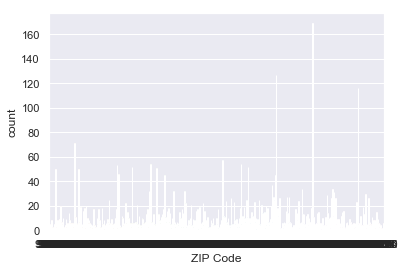

In [11]:
sns.countplot(df['ZIP Code'])

In [12]:
df['ZIP Code'].value_counts().head(10)

94720    169
94305    127
95616    116
90095     71
93106     57
93943     54
92037     54
91320     53
91711     52
94025     52
Name: ZIP Code, dtype: int64

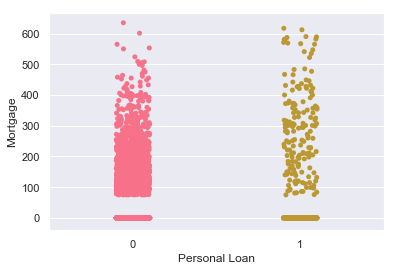

In [16]:
sns.stripplot(df['Personal Loan'], df['Mortgage'])

In [32]:
df[(df['Mortgage'] == 0) & (df['Personal Loan'] == 1) ].count() #liability customers or depositors who accepted the loan

Age              312
Income           312
ZIP Code         312
Family           312
CCAvg            312
Education        312
Mortgage         312
Personal Loan    312
Online           312
dtype: int64

In [18]:
df[(df['Mortgage'] > 0) & (df['Personal Loan'] == 1) ].count() #asset customers or borrowers who accepted loan

ID                    168
Age                   168
Experience            168
Income                168
ZIP Code              168
Family                168
CCAvg                 168
Education             168
Mortgage              168
Personal Loan         168
Securities Account    168
CD Account            168
Online                168
CreditCard            168
dtype: int64

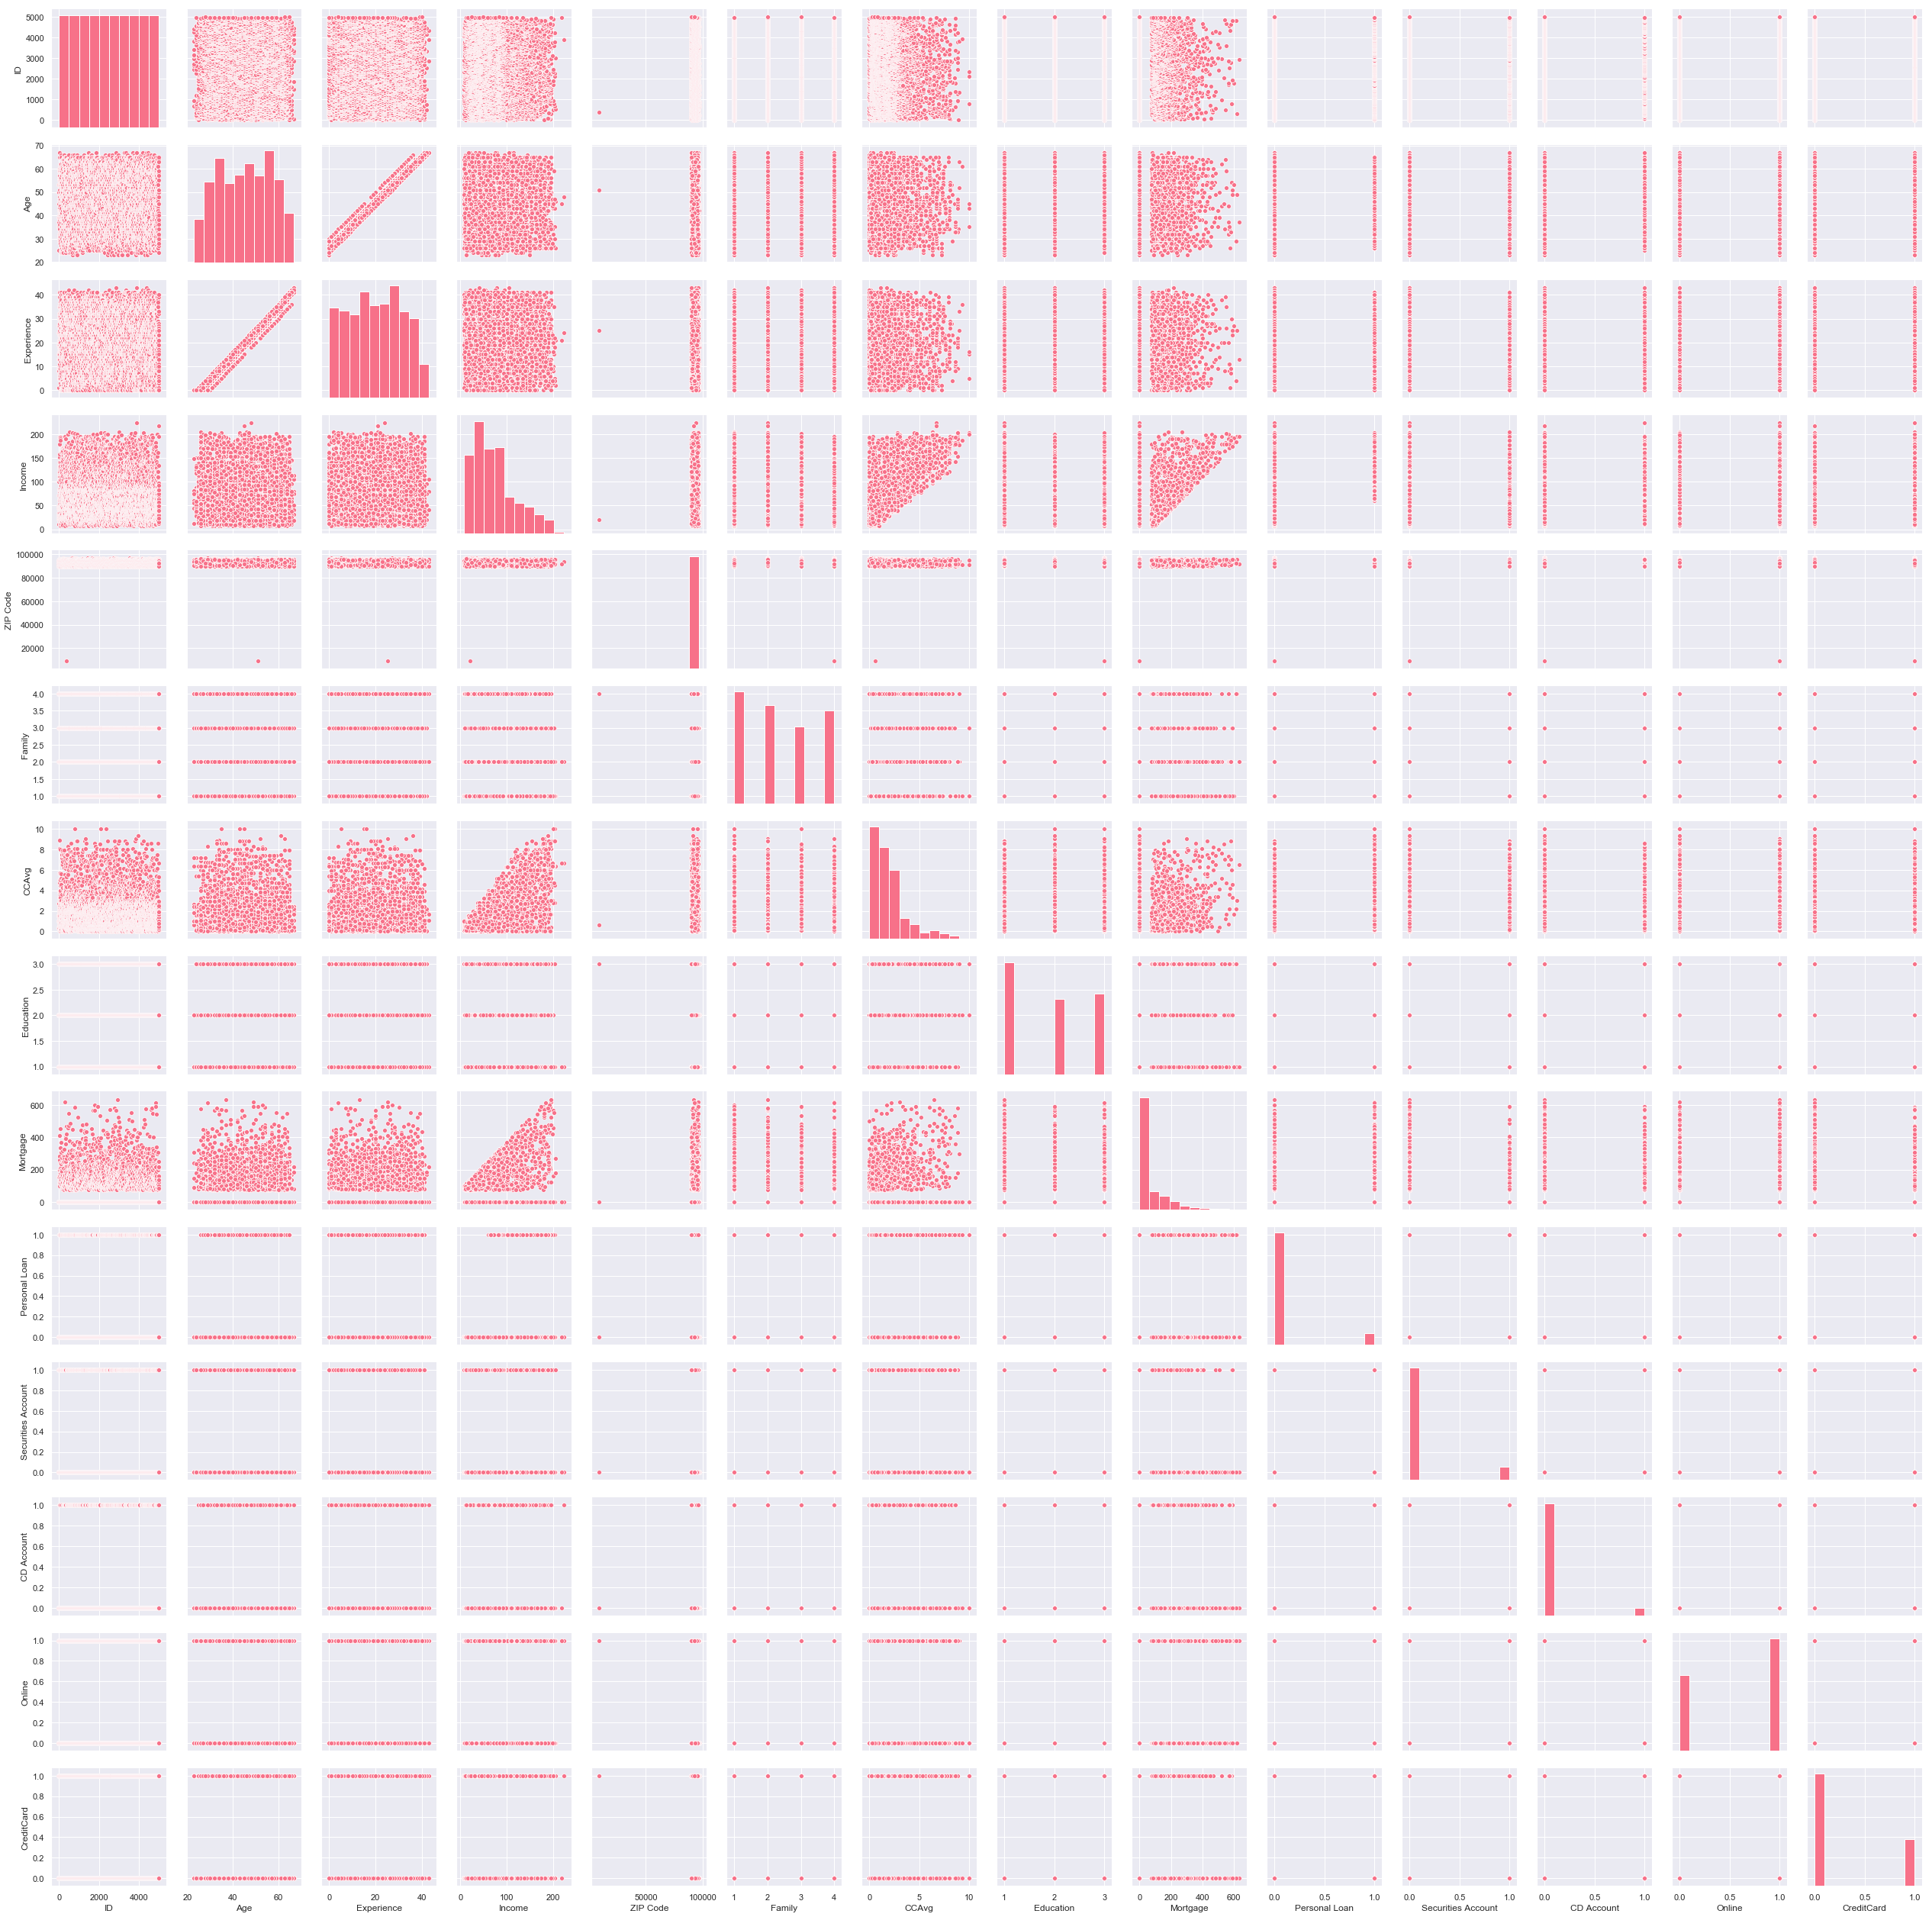

In [19]:
sns.pairplot(df)

* The chart along the diagonal provides the univariate analysis - distribution of data. 
* A general analysis shows only a small percentage have applied for personal loan, have securities account and CD account. Most of them have Online account but less of creditcard holders.
* Age and Experience shows strong correlation

In [20]:
df.corr() # Age and Experience shows strong correlation

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008265,-0.017695,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994198,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008265,0.994198,1.000000,-0.046729,-0.052213,-0.049912,0.013536,-0.010840,-0.007858,-0.001111,0.010046,0.013975,0.008910
Income,-0.017695,-0.055269,-0.046729,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.016797,-0.046418,-0.052213,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.049912,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013536,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010840,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007858,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.016972,-0.000436,-0.001111,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


In [21]:
df=df.drop('ID', axis=1) #remove the ID column
df=df.drop('Experience',axis=1) #remove experience as its strongly correlated to age.
df=df.drop(['Securities Account','CD Account','CreditCard'],axis=1) #weak attributes are removed 

X = df.drop('Personal Loan' , axis=1)
y = df['Personal Loan']

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_val_predict

from sklearn import metrics

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [24]:
# logistic Regression
LRmodel = LogisticRegression()
LRmodel.fit(X_train,y_train)
predicted=LRmodel.predict(X_test)
print(metrics.classification_report(y_test, predicted))
print("Confusion Matrix: \n",metrics.confusion_matrix(y_test, predicted))
print("Accuracy: ",metrics.accuracy_score(y_test, predicted))

             precision    recall  f1-score   support

          0       0.92      0.97      0.95      1342
          1       0.55      0.26      0.35       158

avg / total       0.88      0.90      0.88      1500

Confusion Matrix: 
 [[1308   34]
 [ 117   41]]
Accuracy:  0.8993333333333333


In [25]:
# Naive Bayes model
NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)
predicted = NBmodel.predict(X_test)
print(metrics.classification_report(y_test, predicted))
print("Confusion Matrix: \n",metrics.confusion_matrix(y_test, predicted))
print("Accuracy: ",metrics.accuracy_score(y_test, predicted))

             precision    recall  f1-score   support

          0       0.96      0.94      0.95      1342
          1       0.54      0.63      0.58       158

avg / total       0.91      0.90      0.91      1500

Confusion Matrix: 
 [[1256   86]
 [  59   99]]
Accuracy:  0.9033333333333333


In [26]:
import numpy as np
from sklearn.grid_search import GridSearchCV

k = np.arange(2,51)
knn = KNeighborsClassifier()
parameters = {'n_neighbors': k}
GS = GridSearchCV(knn,parameters,cv=10)

C:\Users\smith\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\smith\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [27]:
GS.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [28]:
predicted=GS.predict(X_test)
print(metrics.classification_report(y_test, predicted))
print("Confusion Matrix: \n",metrics.confusion_matrix(y_test, predicted))
print("Accuracy: ",metrics.accuracy_score(y_test, predicted))

             precision    recall  f1-score   support

          0       0.91      0.98      0.94      1342
          1       0.42      0.15      0.22       158

avg / total       0.86      0.89      0.86      1500

Confusion Matrix: 
 [[1310   32]
 [ 135   23]]
Accuracy:  0.8886666666666667


In [29]:
#KNN
KNNmodel = KNeighborsClassifier(n_neighbors= 5, weights = 'uniform', metric='euclidean')
KNNmodel.fit(X_train,y_train)
predicted=KNNmodel.predict(X_test)
print(metrics.classification_report(y_test, predicted))
print("Confusion Matrix: \n",metrics.confusion_matrix(y_test, predicted))
print("Accuracy: ",metrics.accuracy_score(y_test, predicted))

             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1342
          1       0.48      0.20      0.28       158

avg / total       0.87      0.89      0.87      1500

Confusion Matrix: 
 [[1307   35]
 [ 126   32]]
Accuracy:  0.8926666666666667


In [30]:
# Cross validation on Naive Bayes

kfold = KFold(n_splits=10, random_state=1)
results = cross_val_score(NBmodel, X_test, y_test, cv=kfold)
results

array([0.86      , 0.89333333, 0.93333333, 0.89333333, 0.88666667,
       0.88      , 0.91333333, 0.91333333, 0.90666667, 0.91333333])

* Since we have a data imbalance of 4520 (not buying loans) and 480 (buying loans), the models will be able to better predict people not buying loans. 

* However, given our interest in identifying people who are likely to buy loans, Naive Bayes is a better prediction model in this case as the recall of 1 (People buying loans) is high(0.63) whereas all others is less than 0.3 This can be validated against the Confusion matrix.

* Overall accuracy of Naive Bayes is 90% and others is 88 to 89%. 
* kfold cross validation also done on Naive Bayes model. Accuracy range is from 86 - 93%
